In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [58]:
data=pd.read_csv('/content/hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [60]:
data.shape

(17379, 17)

In [61]:
columns=['dteday','casual','registered','instant']

In [62]:
data['season'].unique()

array([1, 2, 3, 4])

In [63]:
data.drop(columns,axis=1,inplace=True)

In [64]:
X = data.drop(columns=['cnt']  )
Y = data['cnt']



In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [67]:
sample_results = []
iterations = 100

In [73]:
def optimize_svm(X_train_sample, y_train_sample):
    param_grid = {
        'C': [0.1,1,10],
        'kernel': ['linear', 'rbf'],
        'epsilon': [0.01, 0.1, 0.2],
    }

    svr = SVR()
    grid = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=0)
    grid.fit(X_train_sample, y_train_sample)

    return grid.best_score_, grid.best_params_

In [75]:
for i in range(10):

    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, Y_train, test_size=0.5, random_state=i)
    best_score, best_params = optimize_svm(X_train_sample, y_train_sample)
    best_accuracy = -best_score
    sample_results.append({
        'Sample': f'S{i+1}',
        'Best Accuracy': best_accuracy,
        'Best Parameters': best_params
    })
    print(f"Sample {i+1} - Best Accuracy: {best_accuracy}, Best Parameters: {best_params}")


Sample 1 - Best Accuracy: 17847.90014903677, Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Sample 2 - Best Accuracy: 18066.483797026896, Best Parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
Sample 3 - Best Accuracy: 18304.807656251713, Best Parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
Sample 4 - Best Accuracy: 18317.313617089778, Best Parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
Sample 5 - Best Accuracy: 17724.491745255986, Best Parameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
Sample 6 - Best Accuracy: 19322.16340468312, Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Sample 7 - Best Accuracy: 17505.84820100375, Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Sample 8 - Best Accuracy: 18107.468338992574, Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Sample 9 - Best Accuracy: 18106.19977215245, Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Sample 10 - Best Accuracy: 18910.923501956837

In [76]:
table = pd.DataFrame(sample_results)
print(table)

   Sample  Best Accuracy                              Best Parameters
0      S1   17847.900149  {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
1      S2   18066.483797   {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
2      S3   18304.807656   {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
3      S4   18317.313617   {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
4      S5   17724.491745   {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
5      S1   17847.900149  {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
6      S2   18066.483797   {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
7      S3   18304.807656   {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
8      S4   18317.313617   {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
9      S5   17724.491745   {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}
10     S6   19322.163405  {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
11     S7   17505.848201  {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
12     S8   18107.468339  {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
13     S9   18106.19

In [77]:
best_sample = max(sample_results, key=lambda x: x['Best Accuracy'])

In [78]:
best_sample

{'Sample': 'S6',
 'Best Accuracy': 19322.16340468312,
 'Best Parameters': {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}}

In [83]:
import seaborn as sns
def plot_convergence_graph(X_train_sample, y_train_sample):
    accuracies = []

    for iteration in range(1, iterations + 1):
        # Use only a portion of the data as iterations progress
        sample_size = int(len(X_train_sample) * (iteration / iterations))
        X_sample_iter = X_train_sample[:sample_size]
        y_sample_iter = y_train_sample[:sample_size]

        # Fit the model on the subset of the data
        svr = SVR(kernel=best_sample['Best Parameters']['kernel'],
                  C=best_sample['Best Parameters']['C'],
                  epsilon=best_sample['Best Parameters']['epsilon'])
        svr.fit(X_sample_iter, y_sample_iter)

        # Predict and calculate accuracy (MSE)
        y_pred = svr.predict(X_sample_iter)
        mse = mean_squared_error(y_sample_iter, y_pred)
        accuracies.append(-mse)

    # Plot the convergence graph
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=range(1, iterations + 1), y=accuracies)
    plt.title(f'Convergence graph of best SVM (Sample {best_sample["Sample"]})')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy (Negative MSE)')
    plt.grid(True)
    plt.show()



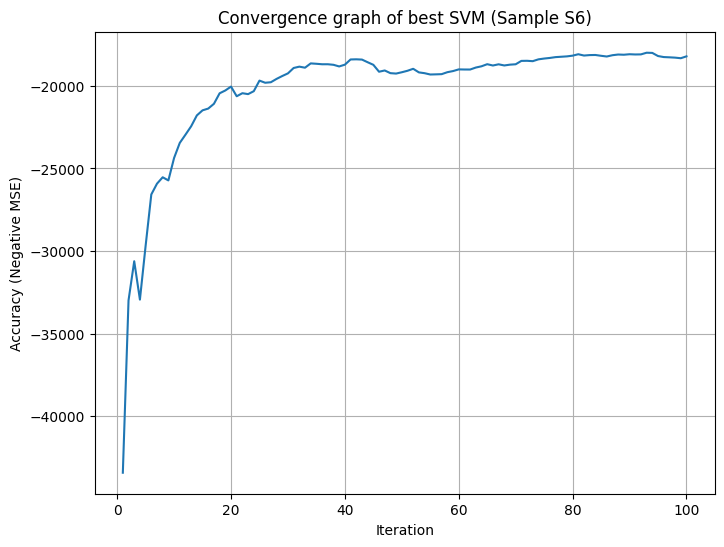

In [84]:
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, Y_train, test_size=0.5, random_state=int(best_sample['Sample'][-1]) - 1)
plot_convergence_graph(X_train_sample, y_train_sample)

In [85]:
table.to_csv("svm_optimization_results.csv", index=False)